# Spectral Clustering on Synthetic Hypergraph Dataset


Incidence Matrix (H):
array([[1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1.]])

Vertex Degree Matrix (D_v):
array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
c:\Users\anand\anaconda3\lib\site-packages\hypernetx

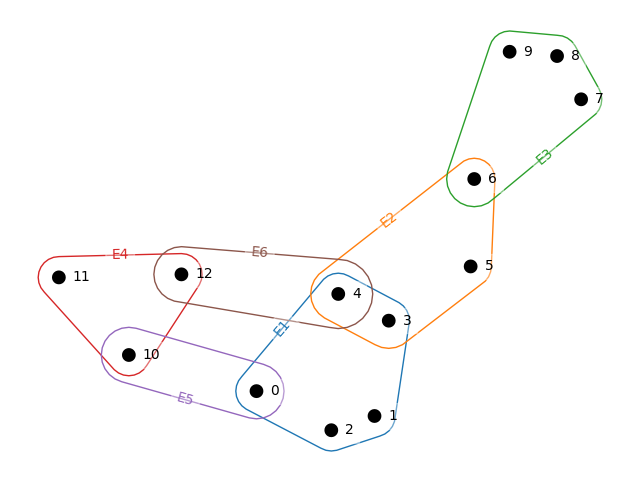

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
from numpy.linalg import eigh
from pprint import pprint

# Define synthetic hypergraph
hyperedges = {
    "E1": [0, 1, 2, 3, 4],       # Dense region
    "E2": [3, 4, 5, 6],           # Dense region
    "E3": [6, 7, 8, 9],           # Sparse region
    "E4": [10, 11, 12],           # Sparse region
    "E5": [0, 10],                # Weak connection between clusters
    "E6": [4, 12]                 # Another weak connection
}

# Get unique nodes
all_nodes = sorted(set(node for edge in hyperedges.values() for node in edge))
node_index = {node: i for i, node in enumerate(all_nodes)}
num_nodes = len(all_nodes)
num_edges = len(hyperedges)

# Create Incidence Matrix (H)
H = np.zeros((num_nodes, num_edges))
for j, (edge, nodes) in enumerate(hyperedges.items()):
    for node in nodes:
        H[node_index[node], j] = 1

print("\nIncidence Matrix (H):")
pprint(H)

d_v = np.sum(H, axis=1)
D_v = np.diag(d_v)

d_e = np.sum(H, axis=0)
D_e = np.diag(d_e)

print("\nVertex Degree Matrix (D_v):")
pprint(D_v)
print("\nHyperedge Degree Matrix (D_e):")
pprint(D_e)

# Compute Laplacian Matrix (L)
D_v_inv_sqrt = np.diag(1.0 / np.sqrt(d_v + 1e-10))
D_e_inv = np.diag(1.0 / (d_e + 1e-10))
H_term = D_v_inv_sqrt @ H @ D_e_inv @ H.T @ D_v_inv_sqrt
L = np.eye(num_nodes) - H_term

print("\nLaplacian Matrix (L):")
pprint(L)

# Find Fiedler Vector for Clustering
eigenvalues, eigenvectors = eigh(L)
fiedler_vector = eigenvectors[:, 1]

# Partitioning Based on Fiedler Vector
cluster1 = [node for i, node in enumerate(all_nodes) if fiedler_vector[i] >= 0]
cluster2 = [node for i, node in enumerate(all_nodes) if fiedler_vector[i] < 0]

print("\nPartitioning Results:")
print(f"Cluster 1: {cluster1}")
print(f"Cluster 2: {cluster2}")

# Visualizing the Hypergraph
H_visual = hnx.Hypergraph(hyperedges)
fig, ax = plt.subplots(figsize=(8, 6))
hnx.draw(H_visual, with_edge_labels=True, ax=ax)
# plt.title("Synthetic Hypergraph with Two Clusters")
plt.show()


In [8]:
import warnings
import sys

# Suppress ALL warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")



Processing Hypergraph: Core-Periphery

Incidence Matrix (H):
array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

Vertex Degree Matrix (D_v):
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 

c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

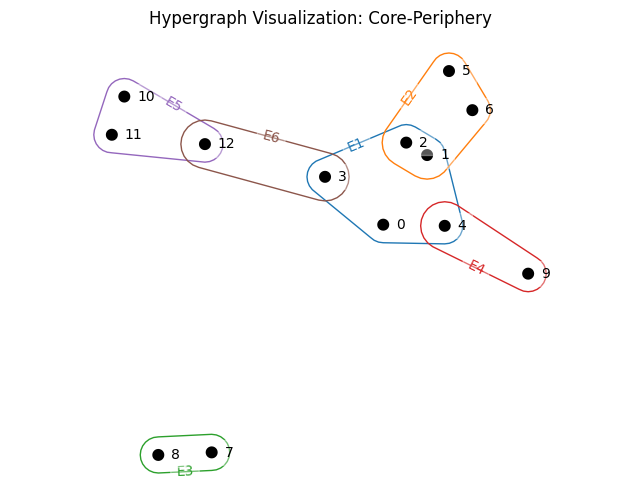


Processing Hypergraph: Two Weakly Connected Communities

Incidence Matrix (H):
array([[1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1.]])

Vertex Degree Matrix (D_v):
array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]])

Hyperedge Degree Matrix (D_e):
array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 2.,

c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

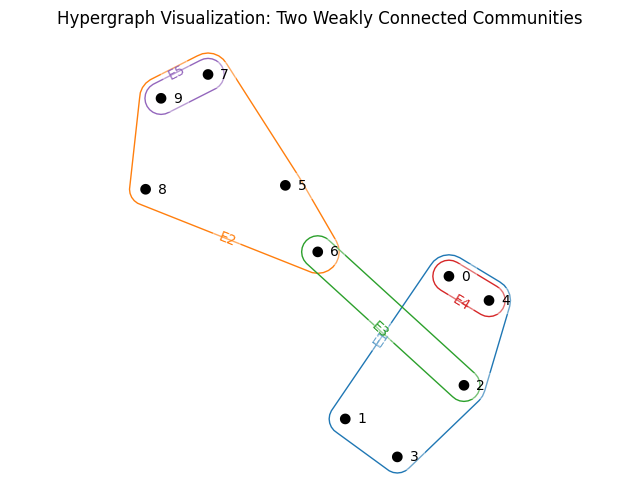

c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this


Processing Hypergraph: Ring with Hubs

Incidence Matrix (H):
array([[1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1.]])

Vertex Degree Matrix (D_v):
array([[2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2.]])

Hyperedge Degree Matrix (D_e):
array([[3., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 4.]])

Laplacian Matrix (L):
array([[ 0.66666667, -0.16666667, -0.16666667,  0.        ,  0.        ,
         0.        , -0.16666667, -0.16666667],
       [-0.16666667,  0.7

c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
c:\Users\anand\anaconda3\lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

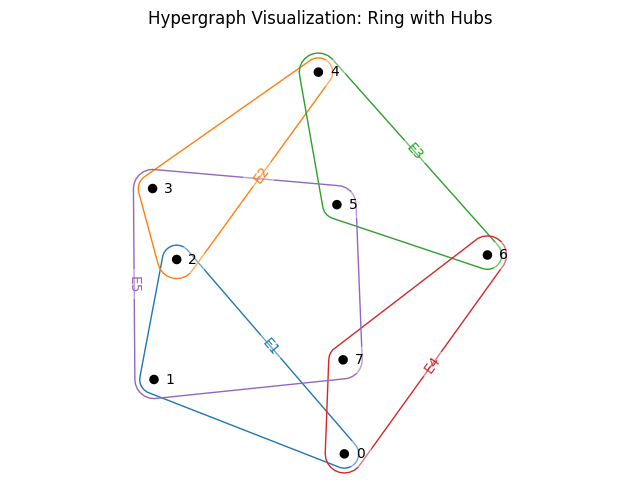

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import hypernetx as hnx
from numpy.linalg import eigh
from pprint import pprint

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Define new hypergraphs
hypergraph_cases = {
    "Core-Periphery": {
        "E1": [0, 1, 2, 3, 4],       # Strong core
        "E2": [1, 2, 5, 6],          # Core extension
        "E3": [7, 8],                # Isolated peripheral nodes
        "E4": [4, 9],                # Weak bridge to periphery
        "E5": [10, 11, 12],          # Peripheral cluster
        "E6": [3, 12]                # Weak connection to periphery
    },
    "Two Weakly Connected Communities": {
        "E1": [0, 1, 2, 3, 4],       # Community 1
        "E2": [5, 6, 7, 8, 9],       # Community 2
        "E3": [2, 6],                # Weak bridge between 1 and 2
        "E4": [0, 4],                # Internal link in 1
        "E5": [7, 9]                 # Internal link in 2
    },
    "Ring with Hubs": {
        "E1": [0, 1, 2],             # Ring node 1
        "E2": [2, 3, 4],             # Ring node 2
        "E3": [4, 5, 6],             # Ring node 3
        "E4": [6, 7, 0],             # Completes the ring
        "E5": [1, 3, 5, 7],          # Central hub connections
    }
}

# Loop through each hypergraph case
for name, hyperedges in hypergraph_cases.items():
    print(f"\n{'='*40}\nProcessing Hypergraph: {name}\n{'='*40}")

    # Get unique nodes
    all_nodes = sorted(set(node for edge in hyperedges.values() for node in edge))
    node_index = {node: i for i, node in enumerate(all_nodes)}
    num_nodes = len(all_nodes)
    num_edges = len(hyperedges)

    # Construct Incidence Matrix (H)
    H = np.zeros((num_nodes, num_edges))
    for j, (edge, nodes) in enumerate(hyperedges.items()):
        for node in nodes:
            H[node_index[node], j] = 1

    print("\nIncidence Matrix (H):")
    pprint(H)

    # Compute Degree Matrices
    d_v = np.sum(H, axis=1)
    D_v = np.diag(d_v)
    d_e = np.sum(H, axis=0)
    D_e = np.diag(d_e)

    print("\nVertex Degree Matrix (D_v):")
    pprint(D_v)
    print("\nHyperedge Degree Matrix (D_e):")
    pprint(D_e)

    # Compute Laplacian (L)
    D_v_inv_sqrt = np.diag(1.0 / np.sqrt(d_v + 1e-10))
    D_e_inv = np.diag(1.0 / (d_e + 1e-10))
    H_term = D_v_inv_sqrt @ H @ D_e_inv @ H.T @ D_v_inv_sqrt
    L = np.eye(num_nodes) - H_term

    print("\nLaplacian Matrix (L):")
    pprint(L)

    # Clustering using Fiedler Vector
    eigenvalues, eigenvectors = eigh(L)
    fiedler_vector = eigenvectors[:, 1]
    cluster1 = [node for i, node in enumerate(all_nodes) if fiedler_vector[i] >= 0]
    cluster2 = [node for i, node in enumerate(all_nodes) if fiedler_vector[i] < 0]

    print("\nPartitioning Results:")
    print(f"Cluster 1: {cluster1}")
    print(f"Cluster 2: {cluster2}")

    # Visualizing the Hypergraph
    H_visual = hnx.Hypergraph(hyperedges)
    fig, ax = plt.subplots(figsize=(8, 6))
    hnx.draw(H_visual, with_edge_labels=True, ax=ax)
    plt.title(f"Hypergraph Visualization: {name}")
    plt.show()


# K Means VS Spectral Clustering

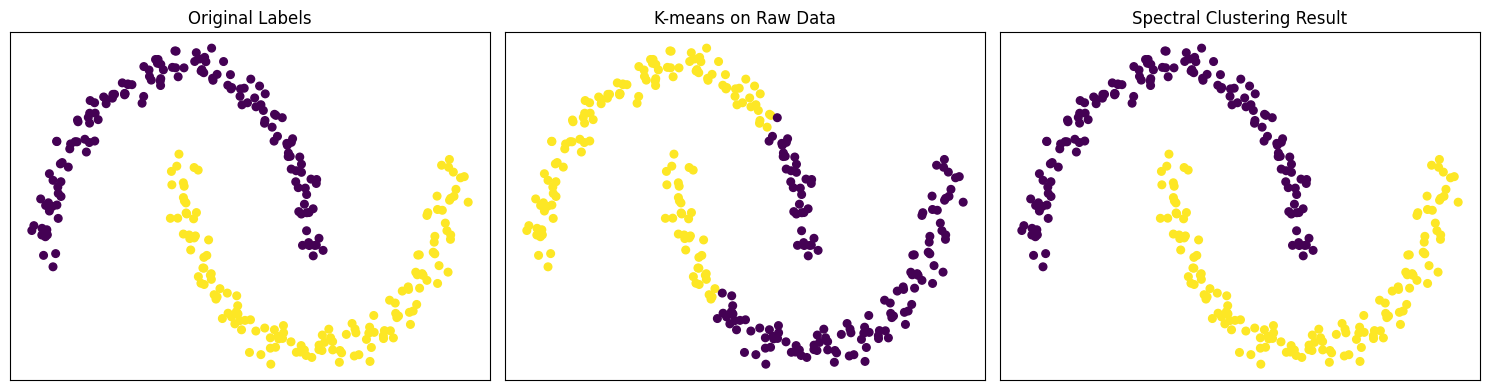

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.linalg import eigsh
from sklearn.preprocessing import normalize

X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

sigma = 0.1
A = rbf_kernel(X, gamma=1.0 / (2 * sigma**2))
np.fill_diagonal(A, 0)  # Aii = 0

D = np.diag(A.sum(axis=1))
D_inv_sqrt = np.diag(1.0 / np.sqrt(D.diagonal()))
L = D_inv_sqrt @ A @ D_inv_sqrt

k = 2
eigvals, eigvecs = eigsh(L, k=k, which='LA')  

Y = normalize(eigvecs, norm='l2')

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(Y)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
axs[0].set_title("Original Labels")

kmeans_direct = KMeans(n_clusters=2, random_state=42)
direct_labels = kmeans_direct.fit_predict(X)
axs[1].scatter(X[:, 0], X[:, 1], c=direct_labels, cmap='viridis', s=30)
axs[1].set_title("K-means on Raw Data")

axs[2].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
axs[2].set_title("Spectral Clustering Result")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
